In [1]:
import pickle
from skimage import io

import sys
sys.path.append('/Users/jerrytang/.virtualenvs/cv/lib/python2.7/site-packages')

%matplotlib inline

import helpers
import cluster
import evaluation
import registration

## Parameters

In [2]:
match_probility_threshold = 0.2
clustering_subset_fraction = 0.2
cluster_cutoff_distance = 0.9
cluster_accept_size = 0.001
center_assignment_distance = 1
ref_indices = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]

In [3]:
files = ['/Users/jerrytang/summer2k17/hydra/data/contract_512_7_1.csv', '/Users/jerrytang/summer2k17/hydra/data/contract_512_7_2.csv', '/Users/jerrytang/summer2k17/hydra/data/contract_512_7_3.csv']
video_path = '/Users/jerrytang/summer2k17/hydra/data/contract.tif'
# res is 2 for 512 images, 1 for 1024
res = 2 
neuron_to_track = 8
video_save_folder = '/Users/jerrytang/summer2k17/hydra/temp_video'
assignments_save_path = '/Users/jerrytang/summer2k17/hydra/neuron_assignments_real_2.csv'

## Pipeline

In [4]:
full = helpers.load_files(files)

loaded 100 frames
loaded 100 frames
loaded 50 frames
video loaded


In [ ]:
# registration[time][spot] = {vector representation of that spot}
registrations = registration.get_registration(full, [0, 40, 80, 120, 160, 200, 240])

In [ ]:
with open('/Users/jerrytang/summer2k17/hydra/backup_pickle/lmao_reg.pickle', 'wb') as f:
    pickle.dump(registrations, f)

In [6]:
with open('/Users/jerrytang/summer2k17/hydra/backup_pickle/lmao_reg.pickle', 'rb') as f:
    registrations = pickle.load(f)

In [7]:
# flat array of nonzero spot vectors
clustering_subset = cluster.get_subset(registrations, clustering_subset_fraction)

sampled 9409 of 55555 registration vectors for clustering


In [8]:
# cluster_assignments[index] is the cluster that the vector at clustering_subset[index] is assigned to
cluster_assignments = cluster.correlation_hac(clustering_subset, cluster_cutoff_distance)

In [9]:
# clusters[i] = list of indices in clustering_subset for vectors assigned to cluster i
clusters = cluster.reverse_map(cluster_assignments)

total of 351 nonempty clusters


In [10]:
# centers[i] = vector representing the center for the cluster of neuron i
centers = cluster.get_centers(clusters, clustering_subset, cluster_accept_size)

291 of 351 clusters qualified as neurons


In [11]:
# time_assignments[time] = map from spot index to (neuron index, distance)
time_assignments = cluster.assign_neurons(registrations, centers, center_assignment_distance)

46146 of 46146 spots were assigned to neurons


In [13]:
# neurons[n][time] = location of neuron n at time t
neurons = cluster.process_assignments(time_assignments, len(centers), full)

paths found for 291 neurons


In [15]:
helpers.write_neuron_assignments(neurons, assignments_save_path)

In [16]:
vid = io.imread(video_path)

In [17]:
tracked = evaluation.track_vid(vid, neuron_to_track, neurons, res)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


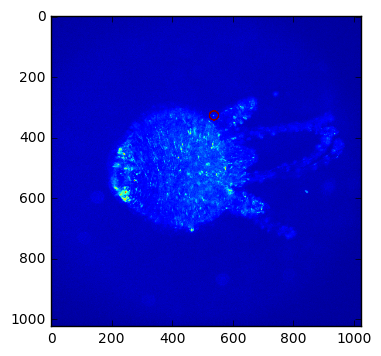

In [23]:
plt.imshow(tracked[20])

In [ ]:
evaluation.save_vid(tracked, video_save_folder)